In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
properati = pd.read_csv('datos/caba_para_mapa.csv',index_col=0,error_bad_lines=False)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:97% !important; }</style>"))
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
from matplotlib.mlab import frange
from sklearn.preprocessing import StandardScaler  

properati=properati.dropna().reset_index()

In [86]:
def bucketnizer(elements_size,max_price,bucket_size=100):
    range_end=0
    bins=[]
    labels=[]
    for i in range(elements_size):
        bins.append(range_end)
        labels.append(i)
        range_end+=bucket_size
        if(range_end>max_price):
            break
    bins.append(max_price)
    return bins,labels

In [90]:
# Correme para bucketizar el set
clf = svm.SVC()
scaler = StandardScaler()  
max_price=properati.loc[properati['price_usd_per_m2'].idxmax()]['price_usd_per_m2']

bins,labels=bucketnizer(len(properati.index),max_price)

properati['categories_by_price']=pd.cut(properati['price_usd_per_m2'],bins,labels=labels)
properati['price_range']=pd.cut(properati['price_usd_per_m2'],bins)


# Validation Curve

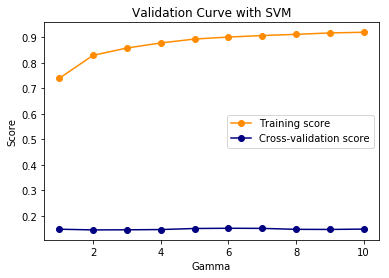

In [91]:
X = zip(properati['dist_a_subte'],properati['dist_a_univ'],properati['surface_total_in_m2'])
y = properati['categories_by_price']
scaler.fit(X)

param_range=frange(1,10,1)
train_scores, test_scores = validation_curve(
clf, X, y, param_name="C",param_range=param_range,
cv=2,scoring="accuracy" ,n_jobs=-1)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.title("Validation Curve with SVM")
plt.xlabel("Gamma")
plt.ylabel("Score")

plt.plot(param_range, train_scores_mean, label="Training score",
color="darkorange",marker="o")
plt.plot(param_range, test_scores_mean, label="Cross-validation score",
color="navy",marker="o")

plt.legend(loc="best")
plt.show()

# Grid Search

In [89]:
import numpy as np
from time import time
from scipy.stats import randint as sp_randint

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_digits

#preparo set de datos
X = zip(properati['dist_a_subte'],properati['dist_a_univ'],properati['surface_total_in_m2'])
y = properati['categories_by_price']

def report(results, n_top=10):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean training score: {0:.3f} (std: {1:.3f})".format(
                results['mean_train_score'][candidate],
                results['std_train_score'][candidate]))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                results['mean_test_score'][candidate],
                results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
        
gamma=range(0,10,1)
c=frange(1,10,1)
param_grid = {"gamma": gamma, "C":c}
grid_search = GridSearchCV(clf,param_grid=param_grid,cv=2,scoring="neg_mean_squared_error")
start = time()
grid_search.fit(X, y)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
    % (time() - start, len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)

GridSearchCV took 46.00 seconds for 100 candidate parameter settings.
Model with rank: 1
Mean training score: -0.507 (std: 0.226)
Mean validation score: -20.414 (std: 0.659)
Parameters: {'C': 7, 'gamma': 9}

Model with rank: 1
Mean training score: -0.507 (std: 0.226)
Mean validation score: -20.414 (std: 0.659)
Parameters: {'C': 8, 'gamma': 9}

Model with rank: 1
Mean training score: -0.507 (std: 0.226)
Mean validation score: -20.414 (std: 0.659)
Parameters: {'C': 9, 'gamma': 9}

Model with rank: 1
Mean training score: -0.507 (std: 0.226)
Mean validation score: -20.414 (std: 0.659)
Parameters: {'C': 10, 'gamma': 9}

Model with rank: 5
Mean training score: -0.507 (std: 0.226)
Mean validation score: -20.421 (std: 0.652)
Parameters: {'C': 6, 'gamma': 9}

Model with rank: 6
Mean training score: -1.190 (std: 0.093)
Mean validation score: -20.441 (std: 0.627)
Parameters: {'C': 1, 'gamma': 9}

Model with rank: 7
Mean training score: -0.758 (std: 0.139)
Mean validation score: -20.477 (std: 0.74